# <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. First we need to load the libraries we are going to use throughout our notebook. After which we will load our train and test data under loading data.|

---

In [2]:
import numpy as np
import pandas as pd

In [3]:
#pip install plotly

In [4]:
import scipy as sp # <-- The sister of Numpy, used in our code for numerical efficientcy. 
import matplotlib.pyplot as plt
import seaborn as sns

# Entity featurization and similarity computation
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Libraries used during sorting procedures.
import operator # <-- Convienient item retrieval during iteration 
import heapq # <-- Efficient sorting of large lists

# Imported for our sanity
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
from pandas import MultiIndex

from plotly import graph_objects as go
# set plot style
import seaborn as sns
sns.set()

# <a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section we load the data from the `train csv` file into a DataFrame for Train Data and `test_with_no_labels` file into a DataFrame for Test Data. We will be using Pandas python package to read the csv file from our local computer. We will assign our Train data to name Train and Test Data to Test. |

---

In [5]:
#Load the tweet dataset into a dataframe

test = pd.read_csv(r"C:\Users\AmantleMmokwa\Documents\Amantle\predict\test.csv", nrows=80000)
train = pd.read_csv(r"C:\Users\AmantleMmokwa\Documents\Amantle\predict\train.csv", nrows=80000)

In [6]:
moviesfile = pd.read_csv(r"C:\Users\AmantleMmokwa\Documents\Amantle\predict\movies.csv", nrows=80000)
tags = pd.read_csv(r"C:\Users\AmantleMmokwa\Documents\Amantle\predict\tags.csv", nrows=80000)
imdb = pd.read_csv(r"C:\Users\AmantleMmokwa\Documents\Amantle\predict\imdb_data.csv", nrows=80000)


# <a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

⚡ Description: Exploratory data analysis ⚡ |
:--------------------------- |
In this section, we are required to perform an in-depth analysis of all the variables in the DataFrame. |
we first begin with the vital component which is the EDA, to better understand the dataset we are working with and to gain insight about the features and labels by performing Univariate or Multivariate , Non-graphical or Graphical Analysis"




In [7]:
# Loading and displaying an overview of the data
print('Dimension of train is: ', train.shape)
print('Dimension of test is: ', test.shape)

Dimension of train is:  (80000, 4)
Dimension of test is:  (80000, 2)


In [8]:
print (f'Number of ratings in dataset: {train.shape[0]}')

Number of ratings in dataset: 80000


# Let's take a look at our data

In [9]:
#The first ten rows of the trainig dataset
train.head(10)

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837
5,120949,81768,3.0,1289595242
6,19630,62049,4.0,1246729817
7,21066,2282,1.0,945785907
8,117563,120474,4.0,1515108225
9,144018,1997,5.0,1109967647


After taking a look at the frist ten rows of the dataframe we can see that we have Four (4) columns in the dataFrame The test dataFrame contains only the features.

We have two features and one label features inludes:

- userId
- movieId
- timestamp

label:

- rating

Now let's take a look at the data types in the dataframe using pd.info() to get more information about the dataframe

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userId     80000 non-null  int64  
 1   movieId    80000 non-null  int64  
 2   rating     80000 non-null  float64
 3   timestamp  80000 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 2.4 MB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   userId   80000 non-null  int64
 1   movieId  80000 non-null  int64
dtypes: int64(2)
memory usage: 1.2 MB


In [12]:
moviesfile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   userId   80000 non-null  int64
 1   movieId  80000 non-null  int64
dtypes: int64(2)
memory usage: 1.2 MB


In [14]:
train.describe()

,userId,movieId,rating,timestamp
count,80000.000000,80000.000000,80000.000000,8.000000e+04
mean,81129.886625,21448.683075,3.534919,1.215658e+09
std,46919.363603,39158.138896,1.061072,2.268003e+08
min,2.000000,1.000000,0.500000,8.231852e+08
25%,40458.000000,1197.000000,3.000000,1.012607e+09
50%,80914.000000,2948.000000,3.500000,1.199045e+09
75%,121624.000000,8641.000000,4.000000,1.447086e+09
max,162541.000000,208889.000000,5.000000,1.574328e+09


In [15]:
moviesfile.describe()

,movieId
count,62423.000000
mean,122220.387646
std,63264.744844
min,1.000000
25%,82146.500000
50%,138022.000000
75%,173222.000000
max,209171.000000


In [16]:
tags.describe()

,userId,movieId,timestamp
count,80000.000000,80000.000000,8.000000e+04
mean,5307.620475,28054.020300,1.464698e+09
std,1793.570735,49022.849695,1.174883e+08
min,3.000000,1.000000,1.137128e+09
25%,3975.000000,1929.000000,1.449453e+09
50%,6550.000000,4112.000000,1.527453e+09
75%,6550.000000,27728.000000,1.528590e+09
max,6550.000000,206727.000000,1.574253e+09


In [17]:
#checking null values in the training data
train.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64



Our training data shows that we have 0 null values which means we don't have any missing values.

In [18]:
moviesfile.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [19]:
tags.isnull().sum()

userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

In [20]:
tags.dropna()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455
...,...,...,...,...
79995,6550,6365,hero,1527452919
79996,6550,6365,key,1527452919
79997,6550,6365,kung fu,1527452919
79998,6550,6365,man vs machine,1527452919


In [21]:
# look at data statistics
train.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [22]:
#Checking for unique values sentiment
train['rating'].value_counts()

4.0    21337
3.0    15520
5.0    11566
3.5    10219
4.5     7035
2.0     5317
2.5     3986
1.0     2493
1.5     1276
0.5     1251
Name: rating, dtype: int64

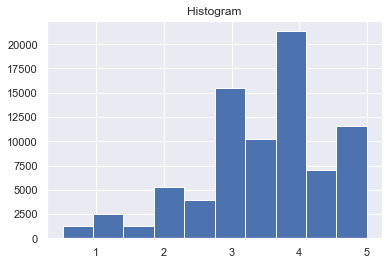

In [23]:
 # hostogram of total_bills
plt.hist(train['rating'])
  
plt.title("Histogram")
  
# Adding the legends
plt.show()

In [24]:

table = pd.merge(train,moviesfile, on = 'movieId', how = 'outer')

Average rating in dataset: 3.53491875


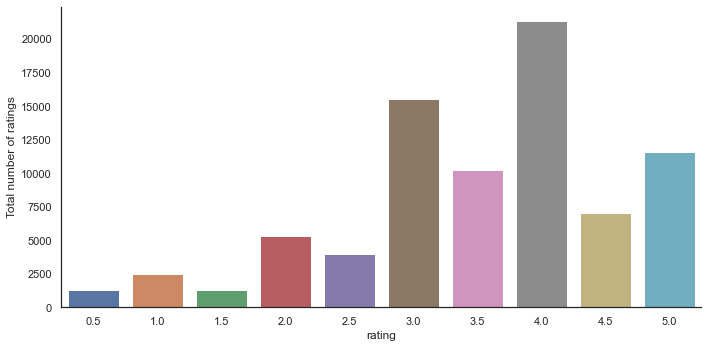

In [25]:
with sns.axes_style('white'):
    g = sns.factorplot("rating", data=table, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")
print (f'Average rating in dataset: {np.mean(table["rating"])}')

# <a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
|⚡ Description: Data engineering ⚡ |
|:--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase our datasets contains a non_numerical column certain preprocessing steps must be carried out, which involves:


#### Data processing




In [26]:
# Loading and displaying an overview of the data
print('Dimension of train is: ', train.shape)
print('Dimension of test is: ', test.shape)

Dimension of train is:  (80000, 4)
Dimension of test is:  (80000, 2)


1. There are 4 columns and 10000038 rows for the Train Data.
2. There are 2 columns and 5000019 for the Test Data.

A look at the first ten rows of our data

In [27]:
train.head(5)

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [28]:
moviesfile.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [29]:
tags.head(5)

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [30]:
table.head(5)

,userId,movieId,rating,timestamp,title,genres
0,5163.0,57669,4.0,1.518350e+09,In Bruges (2008),Comedy|Crime|Drama|Thriller
1,87388.0,57669,3.5,1.237455e+09,In Bruges (2008),Comedy|Crime|Drama|Thriller
2,137050.0,57669,4.0,1.425632e+09,In Bruges (2008),Comedy|Crime|Drama|Thriller
3,120490.0,57669,4.5,1.408229e+09,In Bruges (2008),Comedy|Crime|Drama|Thriller
4,50616.0,57669,4.5,1.446942e+09,In Bruges (2008),Comedy|Crime|Drama|Thriller


In [31]:
print (f'Number of ratings in dataset: {table.shape[0]}')

Number of ratings in dataset: 133068


# <a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
|⚡ Description: Modelling on the movie recommendations system ⚡ |
|:--------------------------- |



#### Train - Test - Split

Before anything we have to split our train data into features and target variables. Split our train data into a train and validation set. This will allow us to evaluate our model performance and chose the best model to use for our submission

---

In [32]:
train.head(5)

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [33]:
moviesfile.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [34]:
tags.head(5)

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [35]:
table.head(100)

,userId,movieId,rating,timestamp,title,genres
0,5163.0,57669,4.0,1.518350e+09,In Bruges (2008),Comedy|Crime|Drama|Thriller
1,87388.0,57669,3.5,1.237455e+09,In Bruges (2008),Comedy|Crime|Drama|Thriller
2,137050.0,57669,4.0,1.425632e+09,In Bruges (2008),Comedy|Crime|Drama|Thriller
3,120490.0,57669,4.5,1.408229e+09,In Bruges (2008),Comedy|Crime|Drama|Thriller
4,50616.0,57669,4.5,1.446942e+09,In Bruges (2008),Comedy|Crime|Drama|Thriller
...,...,...,...,...,...,...
95,65868.0,5459,4.5,1.467233e+09,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (...,Action|Comedy|Sci-Fi
96,54309.0,5459,3.0,1.486848e+09,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (...,Action|Comedy|Sci-Fi
97,98949.0,5459,3.0,1.176143e+09,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (...,Action|Comedy|Sci-Fi
98,114439.0,5459,4.0,1.522326e+09,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (...,Action|Comedy|Sci-Fi


In [36]:

table['auth_tags'] = (pd.Series(table[['title']]
                      .fillna('')
                      .values.tolist()).str.join(' '))

# Convienient indexes to map between book titles and indexes of 
# the books dataframe
titles = table['title']
indices = pd.Series(table.index, index=table['title'])

In [37]:
table.head(20)

,userId,movieId,rating,timestamp,title,genres,auth_tags
0,5163.0,57669,4.0,1.518350e+09,In Bruges (2008),Comedy|Crime|Drama|Thriller,In Bruges (2008)
1,87388.0,57669,3.5,1.237455e+09,In Bruges (2008),Comedy|Crime|Drama|Thriller,In Bruges (2008)
2,137050.0,57669,4.0,1.425632e+09,In Bruges (2008),Comedy|Crime|Drama|Thriller,In Bruges (2008)
3,120490.0,57669,4.5,1.408229e+09,In Bruges (2008),Comedy|Crime|Drama|Thriller,In Bruges (2008)
4,50616.0,57669,4.5,1.446942e+09,In Bruges (2008),Comedy|Crime|Drama|Thriller,In Bruges (2008)
5,99887.0,57669,0.5,1.448839e+09,In Bruges (2008),Comedy|Crime|Drama|Thriller,In Bruges (2008)
6,120194.0,57669,4.5,1.479382e+09,In Bruges (2008),Comedy|Crime|Drama|Thriller,In Bruges (2008)
7,847.0,57669,3.5,1.232894e+09,In Bruges (2008),Comedy|Crime|Drama|Thriller,In Bruges (2008)
8,47201.0,57669,4.5,1.464351e+09,In Bruges (2008),Comedy|Crime|Drama|Thriller,In Bruges (2008)
9,94499.0,57669,4.5,1.316689e+09,In Bruges (2008),Comedy|Crime|Drama|Thriller,In Bruges (2008)


In [38]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1,2),
                     min_df=0, stop_words='english')

# Produce a feature matrix, where each row corresponds to a book,
# with TF-IDF features as columns 
tf_authTags_matrix = tf.fit_transform(table['auth_tags'])

In [39]:
cosine_sim_authTags = cosine_similarity(tf_authTags_matrix,
                                        tf_authTags_matrix)

MemoryError: Unable to allocate 132. GiB for an array with shape (133068, 133068) and data type float64

In [ ]:
print (cosine_sim_authTags.shape)


In [ ]:
def content_generate_top_N_recommendations(movie_title, N=10):
    # Convert the string book title to a numeric index for our 
    # similarity matrix
    b_idx = indices[movie_title]
    # Extract all similarity values computed with the reference book title
    sim_scores = list(enumerate(cosine_sim_authTags[b_idx]))
    # Sort the values, keeping a copy of the original index of each value
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Select the top-N values for recommendation
    sim_scores = sim_scores[1:N]
    # Collect indexes 
    book_indices = [i[0] for i in sim_scores]
    # Convert the indexes back into titles 
    return titles.iloc[movie_indices]

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [42]:
#We are converting our textual features into a format which enables us to compute their relative similarities to one another


tf = TfidfVectorizer(analyzer='word', ngram_range=(1,2),
                     min_df=0, stop_words='english')

# Produce a feature matrix, where each row corresponds to a movie,
# with TF-IDF features as columns 
tf_authTags_matrix = tf.fit_transform(table['auth_tags'])

In [43]:
from scipy import spatial
from sklearn.metrics.pairwise import cosine_similarity,cosine_distances

In [44]:
cosine_sim_authTags = cosine_similarity(tf_authTags_matrix,
                                        tf_authTags_matrix)
print (cosine_sim_authTags.shape)

MemoryError: Unable to allocate 132. GiB for an array with shape (133068, 133068) and data type float64

In [ ]:
cosine_sim_authTags[:5]

### Recommendations

In [ ]:
def content_generate_top_N_recommendations(movie_title, N=10):
    # Convert the string book title to a numeric index for our 
    # similarity matrix
    b_idx = indices[movie_title]
    # Extract all similarity values computed with the reference book title
    sim_scores = list(enumerate(cosine_sim_authTags[b_idx]))
    # Sort the values, keeping a copy of the original index of each value
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Select the top-N values for recommendation
    sim_scores = sim_scores[1:N]
    # Collect indexes 
    movie_indices = [i[0] for i in sim_scores]
    # Convert the indexes back into titles 
    return titles.iloc[movie_indices]

In [ ]:
content_generate_top_N_recommendations("Father of the Bride Part II (1995)", N=10)

In [ ]:
def content_generate_rating_estimate(movie_title, user, rating_data, k=20, threshold=0.0):
    # Convert the book title to a numeric index for our 
    # similarity matrix
    b_idx = indices[movie_title]
    neighbors = [] # <-- Stores our collection of similarity values 

    # Gather the similarity ratings between each book the user has rated
    # and the reference book 
    for index, row in rating_data[rating_data['user_id']==user].iterrows():
        sim = cosine_sim_authTags[b_idx-1, indices[row['title']]-1]
        neighbors.append((sim, row['rating']))
    # Select the top-N values from our collection
    k_neighbors = heapq.nlargest(k, neighbors, key=lambda t: t[0])

    # Compute the weighted average using similarity scores and 
    # user item ratings. 
    simTotal, weightedSum = 0, 0
    for (simScore, rating) in k_neighbors:
        # Ensure that similarity ratings are above a given threshold
        if (simScore > threshold):
            simTotal += simScore
            weightedSum += simScore * rating
    try:
        predictedRating = weightedSum / simTotal
    except ZeroDivisionError:
        # Cold-start problem - No ratings given by user. 
        # We use the average rating for the reference item as a proxy in this case 
        predictedRating = np.mean(rating_data[rating_data['title']==book_title]['rating'])
    return predictedRating

In [ ]:
def content_generate_rating_estimate(movie_title, user, rating_data, k=20, threshold=0.0):
    # Convert the book title to a numeric index for our 
    # similarity matrix
    b_idx = indices[movie_title]
    neighbors = [] # <-- Stores our collection of similarity values 

    # Gather the similarity ratings between each book the user has rated
    # and the reference book 
    for index, row in rating_data[table['userId']==user].iterrows():
        sim = cosine_sim_authTags[b_idx-1, indices[row['title']]-1]
        neighbors.append((sim, row['rating']))
    # Select the top-N values from our collection
    k_neighbors = heapq.nlargest(k, neighbors, key=lambda t: t[0])

    # Compute the weighted average using similarity scores and 
    # user item ratings. 
    simTotal, weightedSum = 0, 0
    for (simScore, rating) in k_neighbors:
        # Ensure that similarity ratings are above a given threshold
        if (simScore > threshold):
            simTotal += simScore
            weightedSum += simScore * rating
    try:
        predictedRating = weightedSum / simTotal
    except ZeroDivisionError:
        # Cold-start problem - No ratings given by user. 
        # We use the average rating for the reference item as a proxy in this case 
        predictedRating = np.mean(rating_data[rating_data['title']==movie_title]['rating'])
    return predictedRating

In [45]:
# Subset of ratings from user 314
table[table['userId'] == 80854.0]

,userId,movieId,rating,timestamp,title,genres,auth_tags
915,80854.0,2716,4.0,941616924.0,Ghostbusters (a.k.a. Ghost Busters) (1984),Action|Comedy|Sci-Fi,Ghostbusters (a.k.a. Ghost Busters) (1984)


In [46]:
title = "Ghostbusters (a.k.a. Ghost Busters) (1984)"
actual_rating = table[(table['userId'] == 80854.0) & (table['title'] == title)]['rating'].values[0]
pred_rating = content_generate_rating_estimate(movie_title=title, user=314, rating_data=table)
print (f"Title - {title}")
print ("---")
print (f"Actual rating: \t\t {actual_rating}")
print (f"Predicted rating: \t {pred_rating}")

NameError: name 'content_generate_rating_estimate' is not defined

In [47]:
title = "Pecker (1998)"
actual_rating = table[(table['userId'] == 80854.0) & (table['title'] == title)]['rating'].values[0]
pred_rating = content_generate_rating_estimate(movie_title=title, user=314, rating_data=table)
print (f"Title - {title}")
print ("---")
print (f"Actual rating: \t\t {actual_rating}")
print (f"Predicted rating: \t {pred_rating}")

IndexError: index 0 is out of bounds for axis 0 with size 0

In [48]:
# Subset of ratings from user 314
table[table['userId'] == 21066.0]

,userId,movieId,rating,timestamp,title,genres,auth_tags
142,21066.0,2282,1.0,945785907.0,Pecker (1998),Comedy|Drama,Pecker (1998)


In [49]:
table['title'][18]

'In Bruges (2008)'

In [50]:
table[(table['userId'] == 21066.0) & (table['title'] == 'Pecker (1998)')]['rating'].values


array([1.])

In [51]:
title = "Pecker(1998)"
actual_rating = table[(table['userId'] == 21066.0) & (table['title'] == 'Pecker (1998)')]['rating'].values
pred_rating = content_generate_rating_estimate(movie_title='Pecker (1998)', user=21066.0, rating_data=table)
print (f"Title - {title}")
print ("---")
print (f"Actual rating: \t\t {actual_rating}")
print (f"Predicted rating: \t {pred_rating}")

NameError: name 'content_generate_rating_estimate' is not defined

In [52]:
test.head(10)

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318
5,1,8405
6,1,8786
7,2,150
8,2,356
9,2,497


In [53]:
title = "Father of the Bride Part II (1995)"
actual_rating = table[(table['userId'] == 106343.0) & (table['title'] == 'Father of the Bride Part II (1995)')]['rating'].values.all()
pred_rating = content_generate_rating_estimate(movie_title='Father of the Bride Part II (1995)', user=106343.0, rating_data=table)
print (f"Title - {title}")
print ("---")
print (f"Actual rating: \t\t {actual_rating}")
print (f"Predicted rating: \t {pred_rating}")

NameError: name 'content_generate_rating_estimate' is not defined

In [54]:
table.head(5)

,userId,movieId,rating,timestamp,title,genres,auth_tags
0,5163.0,57669,4.0,1.518350e+09,In Bruges (2008),Comedy|Crime|Drama|Thriller,In Bruges (2008)
1,87388.0,57669,3.5,1.237455e+09,In Bruges (2008),Comedy|Crime|Drama|Thriller,In Bruges (2008)
2,137050.0,57669,4.0,1.425632e+09,In Bruges (2008),Comedy|Crime|Drama|Thriller,In Bruges (2008)
3,120490.0,57669,4.5,1.408229e+09,In Bruges (2008),Comedy|Crime|Drama|Thriller,In Bruges (2008)
4,50616.0,57669,4.5,1.446942e+09,In Bruges (2008),Comedy|Crime|Drama|Thriller,In Bruges (2008)


In [55]:
submission = content_generate_rating_estimate(test)

# Appending the prediction results to the test set, in a new column called pred_rating
output = pd.DataFrame( data = {'userId': test['movieId'],
                               'pred_rating': submission })

NameError: name 'content_generate_rating_estimate' is not defined